# Toronto Police Service's Proposed 2025 Budget: Top 10 Units with Highest Budget for Stationery and Office Supplies

Data was retrieved from teh City of Toronto's Open Data Catalogue (https://open.toronto.ca/dataset/toronto-police-budget/)

This code will enable you to generate a horizontal bar graph displaying the TPS units with the highest amount of money allocated to a particular category of spending.

Below, I have generated a graph of the top 10 units with the most amounts allocated to the category "Stationery and Office Supplies." You can alter the code to generate a graph for a different category of spending, or include more/ fewer units in the graph.

In [117]:
# loading libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy
import PIL
import requests

In [118]:
# loading data

filepath = "/Users/simweeong/Desktop/TPS Budget/TPS Budget 2025.csv"

tps_budget_2025 = pd.read_csv(filepath)

In [119]:
# viewing unaltered data

tps_budget_2025

,_id,Fiscal_Year,Budget_Type,Organizational_Entity,Command_Name,Pillar_Name,District_Name,Unit_Name,Feature_Category,Cost_Element,Cost_Element_Long_Name,Amount
0,1,2025,Proposed Budget,1 - Toronto Police Service,Centralized Service Charges (Command),Centralized Service Chrgs & UNS (Pillar),Centralized Service Charges,Centralized Service Charges,6-Services,4081,Shredding services,50000
1,2,2025,Proposed Budget,1 - Toronto Police Service,Centralized Service Charges (Command),Centralized Service Chrgs & UNS (Pillar),Centralized Service Charges,Centralized Service Charges,1-Salaries,1501,Regular salaries - Chief/Command,0
2,3,2025,Proposed Budget,1 - Toronto Police Service,Centralized Service Charges (Command),Centralized Service Chrgs & UNS (Pillar),Centralized Service Charges,Centralized Service Charges,6-Services,4083,P.E.U. - towing charges,5500
3,4,2025,Proposed Budget,1 - Toronto Police Service,Centralized Service Charges (Command),Centralized Service Chrgs & UNS (Pillar),Centralized Service Charges,Centralized Service Charges,1-Salaries,1502,Regular salaries - Civilian Sr. Officer,0
4,5,2025,Proposed Budget,1 - Toronto Police Service,Centralized Service Charges (Command),Centralized Service Chrgs & UNS (Pillar),Centralized Service Charges,Centralized Service Charges,6-Services,4084,Public relations / promotions,0
...,...,...,...,...,...,...,...,...,...,...,...,...
7684,7685,2025,Proposed Budget,3 - Parking Enforcement,Parking Enforcement,Parking Enforcement (Pillar),Parking Enforcement Unit,Parking Enforcement,6-Services,4970,Services & rents - general,2100
7685,7686,2025,Proposed Budget,3 - Parking Enforcement,Parking Enforcement,Parking Enforcement (Pillar),Parking Enforcement Unit,Parking Enforcement,6-Services,7030,IDC - Printing,0
7686,7687,2025,Proposed Budget,3 - Parking Enforcement,Parking Enforcement,Parking Enforcement (Pillar),Parking Enforcement Unit,Parking Enforcement,6-Services,7080,IDC - Other services,0
7687,7688,2025,Proposed Budget,3 - Parking Enforcement,Parking Enforcement,Parking Enforcement (Pillar),Parking Enforcement Unit,Parking Enforcement,7-Revenues,7650,IDR - Police,0


In [120]:
# creating dataframe with columns of interest

tps_columns = ["Unit_Name", "Cost_Element_Long_Name", "Amount"]

tps_budget_2025_df = pd.DataFrame(tps_budget_2025, columns = tps_columns)

tps_budget_2025_df

,Unit_Name,Cost_Element_Long_Name,Amount
0,Centralized Service Charges,Shredding services,50000
1,Centralized Service Charges,Regular salaries - Chief/Command,0
2,Centralized Service Charges,P.E.U. - towing charges,5500
3,Centralized Service Charges,Regular salaries - Civilian Sr. Officer,0
4,Centralized Service Charges,Public relations / promotions,0
...,...,...,...
7684,Parking Enforcement,Services & rents - general,2100
7685,Parking Enforcement,IDC - Printing,0
7686,Parking Enforcement,IDC - Other services,0
7687,Parking Enforcement,IDR - Police,0


In [121]:
# selecting spending category of interest to generate a new dataframe

spending_category = [" Stationery and office supplies"]

tps_stationery_budget_2025_df = tps_budget_2025_df.loc[tps_budget_2025_df["Cost_Element_Long_Name"].isin(spending_category)]

tps_stationery_budget_2025_df

,Unit_Name,Cost_Element_Long_Name,Amount
157,Centralized Service Charges,Stationery and office supplies,53500
243,Pan Am Games,Stationery and office supplies,0
335,COVID19,Stationery and office supplies,0
378,FIFA World Cup 2026,Stationery and office supplies,0
467,Chief of Police,Stationery and office supplies,24700
...,...,...,...
7166,Proceeds of Crime Frt-Line Policing Grnt,Stationery and office supplies,0
7346,"Centralized Command Charges, Parking",Stationery and office supplies,133000
7376,Police Services Board,Stationery and office supplies,5700
7572,Victim Support Grant,Stationery and office supplies,0


In [122]:
# optional: filtering out "Amount" = 0

tps_stationery_budget_2025_nonzero_df = tps_stationery_budget_2025_df[tps_stationery_budget_2025_df["Amount"]!=0]

tps_stationery_budget_2025_nonzero_df

,Unit_Name,Cost_Element_Long_Name,Amount
157,Centralized Service Charges,Stationery and office supplies,53500
467,Chief of Police,Stationery and office supplies,24700
687,Corporate Communications,Stationery and office supplies,8000
702,Disciplinary Hearing Office,Stationery and office supplies,6000
823,Audit & Quality Assurance,Stationery and office supplies,4000
...,...,...,...
6573,Specialized Operations Command,Stationery and office supplies,1000
6600,Police Dog Services,Stationery and office supplies,3600
7346,"Centralized Command Charges, Parking",Stationery and office supplies,133000
7376,Police Services Board,Stationery and office supplies,5700


In [123]:
# sorting dataframe by "Amount" in descending order

tps_stationery_budget_2025_nonzero_df.sort_values("Amount", ascending = False, inplace = True)

tps_stationery_budget_2025_nonzero_df

/var/folders/k8/rzx6w47n0w9_9kx8c1_cr8lh0000gn/T/ipykernel_16464/109919784.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tps_stationery_budget_2025_nonzero_df.sort_values("Amount", ascending = False, inplace = True)


,Unit_Name,Cost_Element_Long_Name,Amount
7346,"Centralized Command Charges, Parking",Stationery and office supplies,133000
5279,Detective Ops (CONFIDENTIAL),Stationery and office supplies,105600
4837,Infrastructure Services,Stationery and office supplies,76000
7641,Parking Enforcement,Stationery and office supplies,56000
157,Centralized Service Charges,Stationery and office supplies,53500
...,...,...,...
5085,Client Technology Services,Stationery and office supplies,700
3495,Finance & Business Mgmt,Stationery and office supplies,700
3324,CAO's Office,Stationery and office supplies,700
5596,CIO's Office,Stationery and office supplies,500


In [124]:
# optional: selecting top 10 units with the highest amounts allocated to spending category of interest

tps_stationery_budget_2025_nonzero_df.head(10)

,Unit_Name,Cost_Element_Long_Name,Amount
7346,"Centralized Command Charges, Parking",Stationery and office supplies,133000
5279,Detective Ops (CONFIDENTIAL),Stationery and office supplies,105600
4837,Infrastructure Services,Stationery and office supplies,76000
7641,Parking Enforcement,Stationery and office supplies,56000
157,Centralized Service Charges,Stationery and office supplies,53500
2989,Division 31,Stationery and office supplies,42400
1782,Division 55,Stationery and office supplies,39500
2138,Traffic Operations,Stationery and office supplies,36500
5880,Sex Crimes Unit,Stationery and office supplies,35200
1355,Division 42,Stationery and office supplies,35100


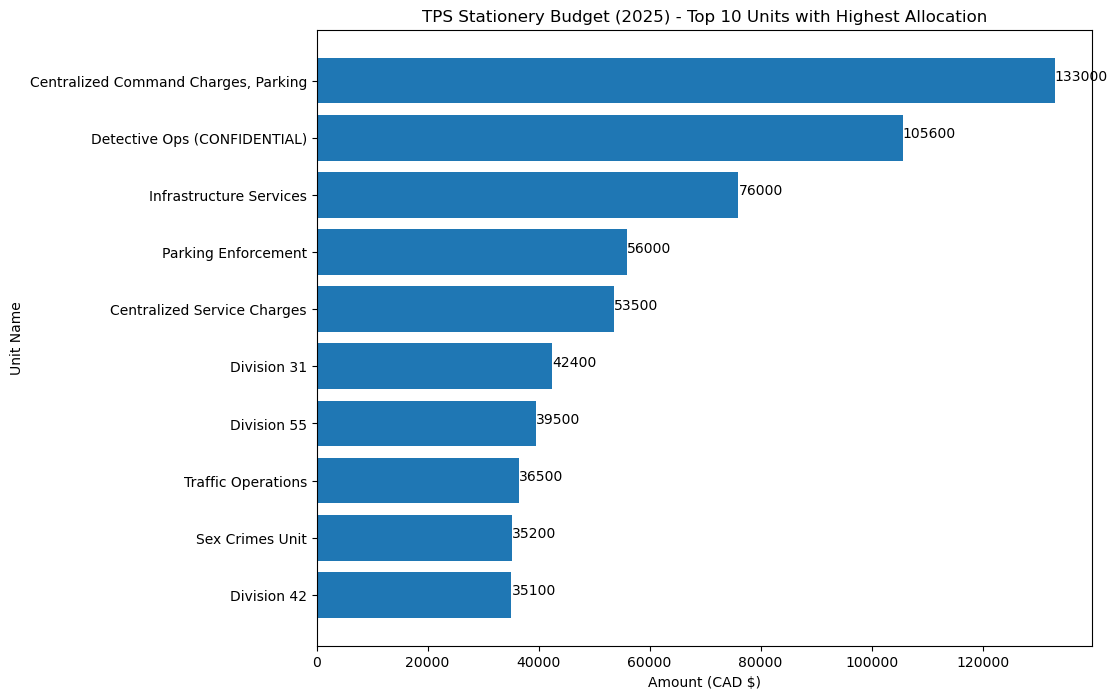

In [125]:
# creating horizontal bar graph

x1 = tps_stationery_budget_2025_nonzero_df.head(10)["Unit_Name"]
y1 = tps_stationery_budget_2025_nonzero_df.head(10)["Amount"]

fig, ax = plt.subplots(figsize = (10,8))        # enlarge the graph if you want to more than 10 units
ax.barh(x1, y1)
plt.gca().invert_yaxis()


# adding labels
ax.set_title("TPS Stationery Budget (2025) - Top 10 Units with Highest Allocation")
ax.set_ylabel("Unit Name")
ax.set_xlabel("Amount (CAD $)")


# adding values
for index, value in enumerate(tps_stationery_budget_2025_nonzero_df.head(10)["Amount"]):
    plt.text(value, index, int(value))
